In [0]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [15]:
# Read population.csv
worldPop_df = pd.read_csv("population_csv.csv")
worldPop_df

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92490932.0
1,Arab World,ARB,1961,95044497.0
2,Arab World,ARB,1962,97682294.0
3,Arab World,ARB,1963,100411076.0
4,Arab World,ARB,1964,103239902.0
...,...,...,...,...
14880,Zimbabwe,ZWE,2012,14710826.0
14881,Zimbabwe,ZWE,2013,15054506.0
14882,Zimbabwe,ZWE,2014,15411675.0
14883,Zimbabwe,ZWE,2015,15777451.0


In [0]:
# Drop the 'Country Code' column
worldPop_df = worldPop_df.drop('Country Code', axis=1)

In [0]:
# Drop rows that are not countries
countriesPop_df = worldPop_df.drop(index=[2621, 968, 1481, 1823, 911, 227, 1595, 2564, 284, 1196, 341, 398, 2279, 2336, 1139, 1937, 854, 2108, 1082, 2507, 2393, 3560, 1424, 512, 2450, 2165, 797, 1538, 1253, 1367, 1310, 1025, 683, 740, 626, 1652, 569, 56, 1709, 1766, 455, 1880])

In [18]:
# Drop duplicates and check for null values
worldPop_df = worldPop_df.drop_duplicates()
worldPop_df_null = worldPop_df.isnull().sum()
worldPop_df_null

Country Name    0
Year            0
Value           0
dtype: int64

CLEANING: 
Dropped 'Country Code' column, not needed. No missing data found. No duplicates were removed.

---
Exploration: 
Find population outliers and their growth curves.

In [0]:
# Top 5 populations 2016 
# Only select from the latest year (2016)
countriesPop_df_2016 = countriesPop_df['Year'] == 2016
pop2016 = countriesPop_df[countriesPop_df_2016]
# Select the 5 countries with the highest population
high5pop = pop2016.sort_values('Value', ascending=False).head()
# Select the 5 countries with the lowest population
low5pop = pop2016.sort_values('Value').head()

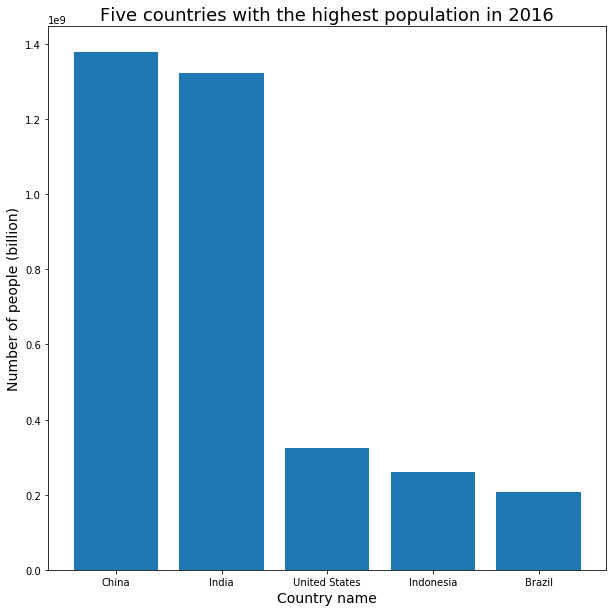

In [20]:
# Visualising the top 5 populated countries
# Format bar graph
fig = plt.figure(figsize=(10,10))
plt.title('Five countries with the highest population in 2016', fontdict={'size':18})
plt.xlabel('Country name', fontdict={'size':14})
plt.ylabel('Number of people (billion)', fontdict={'size':14})
# Plotting data
x = high5pop.loc[:,'Country Name']
y = high5pop.loc[:,'Value']
# Draw graph
plt.bar(x, y)
plt.show()

Visualising the population highlights the disparity China and India have over the others puts into perspective the vast difference at a glance. India has almost four times the population of the United States and they are 2nd and 3rd place. 
Based on these metrics you might be able to decide which market you want to target for sales or advertising. 

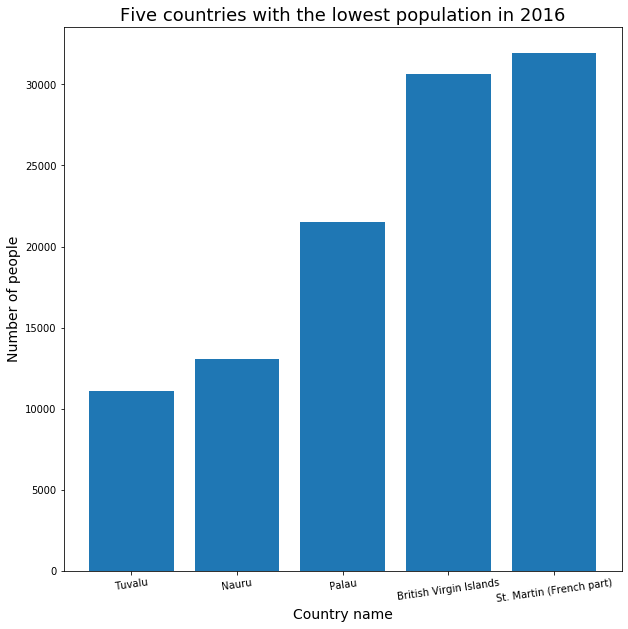

In [21]:
# Visualising the top 5 populated countries
# Format bar graph
fig = plt.figure(figsize=(10,10))
plt.title('Five countries with the lowest population in 2016', fontdict={'size':18})
plt.xlabel('Country name', fontdict={'size':14})
plt.xticks(rotation=8)
plt.ylabel('Number of people', fontdict={'size':14})
# Plotting data
x = low5pop.loc[:,'Country Name']
y = low5pop.loc[:,'Value']
# Draw graph
plt.bar(x, y, )
plt.show()

A striking difference in these two visualisations is that the lower 5 populations are gradually increasing whereas the top 5 populations, China and India in particular, are exponentially higher than the runner up. 
Using these metrics one may want to target these countries with experimental products or services to see if they are viable and effective for a population before taking it worldwide.

---

In [0]:
# Create dataframe per country
# Highest 5 countries' population
China = countriesPop_df['Country Name'] == 'China'
China = countriesPop_df[China].drop('Country Name', axis=1)
India = countriesPop_df['Country Name'] == 'India'
India = countriesPop_df[India]
United_States = countriesPop_df['Country Name'] == 'United States'
United_States = countriesPop_df[United_States]
Indonesia = countriesPop_df['Country Name'] == 'Indonesia'
Indonesia = countriesPop_df[Indonesia]
Brazil = countriesPop_df['Country Name'] == 'Brazil'
Brazil = countriesPop_df[Brazil]
# Lowest 5 countries' population
Tuvalu = countriesPop_df['Country Name'] == 'Tuvalu'
Tuvalu = countriesPop_df[Tuvalu]
Nauru = countriesPop_df['Country Name'] == 'Nauru'
Nauru = countriesPop_df[Nauru]
Palau = countriesPop_df['Country Name'] == 'Palau'
Palau = countriesPop_df[Palau]
British_Virgin_Islands = countriesPop_df['Country Name'] == 'British Virgin Islands'
British_Virgin_Islands = countriesPop_df[British_Virgin_Islands]
St_Martin_French = countriesPop_df['Country Name'] == 'St. Martin (French part)'
St_Martin_French = countriesPop_df[St_Martin_French]

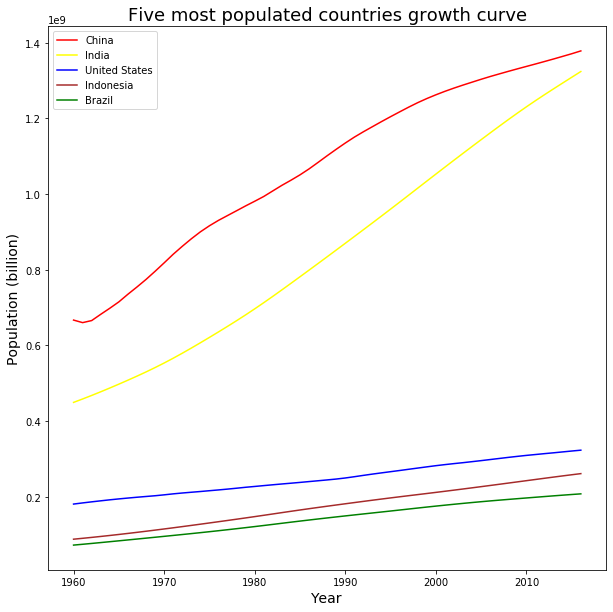

In [23]:
# Population growth of the 5 highest populated countries
# Format graph
fig = plt.figure(figsize=(10,10))
plt.title('Five most populated countries growth curve', fontdict={'size':18})
plt.xlabel('Year', fontdict={'size':14})
plt.ylabel('Population (billion)', fontdict={'size':14})
# Plotting data
year = China['Year']
yChina = China['Value']
yIndia = India['Value']
yUSA = United_States['Value']
yIndonesia = Indonesia['Value']
yBrazil = Brazil['Value']
# Draw and format lines
plotChina, = plt.plot(year, yChina, color='red', label='China')
plotIndia, = plt.plot(year, yIndia, color='yellow', label='India')
plotUnited_States, = plt.plot(year, yUSA, color='blue', label='United States')
plotIndonesia, = plt.plot(year, yIndonesia, color='brown', label='Indonesia')
plotBrazil, = plt.plot(year, yBrazil, color='green', label='Brazil')
# Draw legend and graph
plt.legend([plotChina, plotIndia, plotUnited_States, plotIndonesia, plotBrazil], ['China', 'India', 'United States', 'Indonesia', 'Brazil'])
plt.show()

Unsurprisingly the growth of the most populated countries is steady, especially at the lower end. What is interesting to note is that China with the highest population experiences the most visible variation, occasionally dropping and increasing. India seems to be growing rapidly and steadily. 

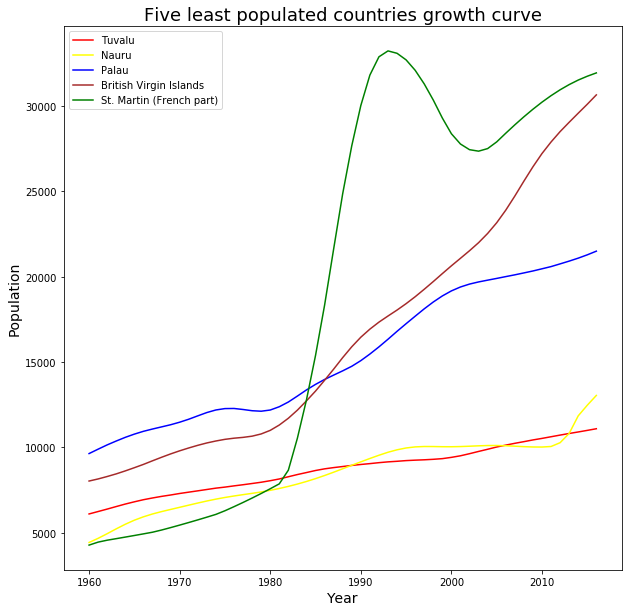

In [24]:
# Population growth of the 5 lowest populated countries
# Format graph
fig = plt.figure(figsize=(10,10))
plt.title('Five least populated countries growth curve', fontdict={'size':18})
plt.xlabel('Year', fontdict={'size':14})
plt.ylabel('Population', fontdict={'size':14})
# Plotting data
year = Tuvalu['Year']
yTuvalu = Tuvalu['Value']
yNauru = Nauru['Value']
yPalau = Palau['Value']
yBritish_Virgin_Islands = British_Virgin_Islands['Value']
ySt_Martin_French = St_Martin_French['Value']
# Draw and format lines
plotTuvalu, = plt.plot(year, yTuvalu, color='red', label='Tuvalu')
plotNauru, = plt.plot(year, yNauru, color='yellow', label='Nauru')
plotPalau, = plt.plot(year, yPalau, color='blue', label='Palau')
plotBritish_Virgin_Islands, = plt.plot(year, yBritish_Virgin_Islands, color='brown', label='British Virgin Islands')
plotSt_Martin_French, = plt.plot(year, ySt_Martin_French, color='green', label='St. Martin (French part)')
# Draw legend and graph
plt.legend([plotTuvalu, plotNauru, plotPalau, plotBritish_Virgin_Islands, plotSt_Martin_French], ['Tuvalu', 'Nauru', 'Palau', 'British Virgin Islands', 'St. Martin (French part)'])
plt.show()

The least populated countries all vary by quite a fair amount. This is propbably due to their sample size to begin with. Any small change at this scale will have a higher visible impact. Most notably St. Martin looks to have more than tripled its population within 10 years and then suddenly drops by 10000.

---

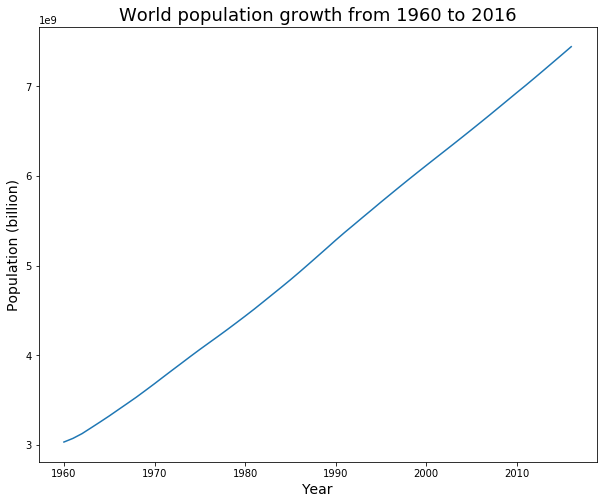

In [25]:
# The world population growth
# 
world_pop = worldPop_df.sort_values('Value', ascending=False)
country = world_pop.loc[:,'Country Name']
world_pop = world_pop[country == 'World']

x = world_pop.loc[:,'Year']
y = world_pop.loc[:,'Value']

fig = plt.figure(figsize=(10,8))
sns.lineplot(x, y)

plt.xlabel('Year', fontdict={'size':14})
plt.ylabel('Population (billion)', fontdict={'size':14})
plt.title('World population growth from 1960 to 2016', fontdict={'size':18})

plt.show()

The world population, I thought it might be interesting to see if the general population spiked at some point in recent histroy or if its growth was declining as it surpassed 7 billion. It looks like between 1960 and 2016 the growth of the worlds population is steady and stable.

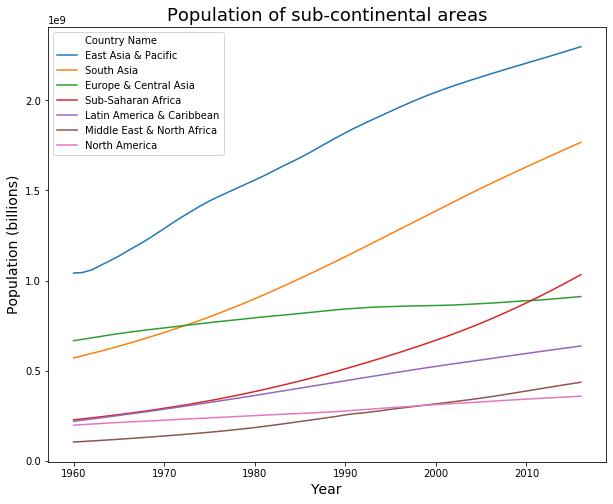

In [26]:
# World population by continental area
# Sort dataframe by population
continent_pop = worldPop_df.sort_values('Value', ascending=False)
# Extract only relevent rows
East_Asia_Pacific = continent_pop[country == 'East Asia & Pacific']
South_Asia = continent_pop[country == 'South Asia']
Europe_Central_Asia = continent_pop[country == 'Europe & Central Asia']
Sub_Saharan_Africa = continent_pop[country == 'Sub-Saharan Africa']
Latin_America_Caribbean = continent_pop[country == 'Latin America & Caribbean']
Middle_East_North_Africa = continent_pop[country == 'Middle East & North Africa']
North_America = continent_pop[country == 'North America']
# Concatenate rows into new dataframe
continents = pd.concat([East_Asia_Pacific, South_Asia, Europe_Central_Asia, Sub_Saharan_Africa, Latin_America_Caribbean, Middle_East_North_Africa, North_America], join='outer')
# Plot graph
fig = plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='Value', hue='Country Name', data=continents)
# Format graph
plt.title('Population of sub-continental areas', fontdict={'size':18})
plt.xlabel('Year', fontdict={'size':14})
plt.ylabel('Population (billions)', fontdict={'size':14})
# Draw graph
plt.show()

Looking at the growth of the sub-continents it looks all but three have slowed down in growth. As we know East Asia and South Asia include China and India respectively and they are still growing in combination with their surrounding areas. Africa, between North and Sub-Saharan Africa, is also just starting to grow. These are developing countries and may be emerging markets that investors could target now that growth is taking place.